In [271]:
import pandas as pd
import datetime as dt 
import pandas as pd
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon
import requests

In [272]:
base_url = 'https://gbfs.capitalbikeshare.com/gbfs/gbfs.json'

def main_request(url):

    r = requests.get(base_url)
    data = r.json()

    return data


def station_info(data):
    
    r = requests.get(data['data']['en']['feeds'][1]['url'])
    station_info = r.json()

    return station_info


def parse_station_info(stations_json):

    station_list = []
    last_update = stations_json['last_updated']
    for station in range(len(stations_json['data']['stations'])):
        region_id = stations_json['data']['stations'][station]['region_id']
        has_kiosk = stations_json['data']['stations'][station]['has_kiosk']
        station_type = stations_json['data']['stations'][station]['station_type']
        adress = stations_json['data']['stations'][station]['name']
        capacity = stations_json['data']['stations'][station]['capacity']
        latitude = stations_json['data']['stations'][station]['lat']
        longitude = stations_json['data']['stations'][station]['lon']
        rental_methods = stations_json['data']['stations'][station]['rental_methods']
        station_id = stations_json['data']['stations'][station]['station_id']
        legacy_id = stations_json['data']['stations'][station]['legacy_id']

        station_dict = {
            'region_id' : region_id,
            'adress' : adress,
            'latitude': latitude,
            'longitude' : longitude,
            'type' : station_type,
            'has_kiosk' : has_kiosk,
            'capacity' : capacity,
            'rental_methods' : rental_methods,
            'station_id' : station_id,
            'legacy_id' : legacy_id,
            'last_updated' : dt.datetime.fromtimestamp(last_update)
        }

        station_list.append(station_dict)
        
    return station_list


def get_bike_info(data):
    
    resp = requests.get(data['data']['en']['feeds'][3]['url'])
    bike_data = resp.json()

    return bike_data


def parse_bike_info(bike_json):
    bike_list = []
    last_update = bike_json['last_updated']
    for bike in range(len(bike_json['data']['bikes'])):
        bike_id = bike_json['data']['bikes'][bike]['bike_id']
        latitude = bike_json['data']['bikes'][bike]['lat']
        longitude = bike_json['data']['bikes'][bike]['lon']
        longitude = bike_json['data']['bikes'][bike]['lon']
        type = bike_json['data']['bikes'][bike]['type']
        reserved = bike_json['data']['bikes'][bike]['is_reserved']
        disabled = bike_json['data']['bikes'][bike]['is_disabled']
        bike_dict = {
            'bike_id' : bike_id,
            'latitude': latitude,
            'longitude' : longitude,
            'bike_type' : type,
            'reserved' : reserved,
            'disabled' : disabled,
            'last_updated' : dt.datetime.fromtimestamp(last_update)
        }
        bike_list.append(bike_dict)
    return bike_list   

In [273]:
df_stations = pd.DataFrame(parse_station_info(station_info(main_request(base_url))))

In [274]:
df_stations.head(10)

,region_id,adress,latitude,longitude,type,has_kiosk,capacity,rental_methods,station_id,legacy_id,last_updated
0,41,Pentagon City Metro / 12th St & S Hayes St,38.862303,-77.059936,classic,True,19,"[KEY, CREDITCARD]",08246df5-1f3f-11e7-bf6b-3863bb334450,6,2023-07-13 15:50:03
1,42,Montello Ave & Holbrook Terr NE,38.907444,-76.986813,classic,True,19,"[KEY, CREDITCARD]",a07bd5e0-5136-4285-ae23-54a74124957e,545,2023-07-13 15:50:03
2,42,14th & Otis Pl NW,38.934405,-77.032687,classic,True,27,"[KEY, CREDITCARD]",2a43f4e2-4102-482e-8879-245cf7555c6b,591,2023-07-13 15:50:03
3,42,1st & Q St SW,38.870824,-77.011915,classic,True,15,"[KEY, CREDITCARD]",84a0159b-5f00-417a-8f06-6c7c8437049f,84a0159b-5f00-417a-8f06-6c7c8437049f,2023-07-13 15:50:03
4,42,Livingston Rd & 3rd St SE,38.823730,-77.002230,classic,True,15,"[KEY, CREDITCARD]",d72b1790-0fea-4af8-9d2a-fd4d4db24d1a,498,2023-07-13 15:50:03
5,42,Lincoln Memorial,38.888255,-77.049436,classic,True,25,"[KEY, CREDITCARD]",08254284-1f3f-11e7-bf6b-3863bb334450,204,2023-07-13 15:50:03
6,42,Smithsonian-National Mall / Jefferson Dr & 12t...,38.888774,-77.028694,classic,True,35,"[KEY, CREDITCARD]",082522f0-1f3f-11e7-bf6b-3863bb334450,169,2023-07-13 15:50:03
7,41,Wilson Blvd & N Oak St,38.895068,-77.073860,classic,True,17,"[KEY, CREDITCARD]",83c9bc80-bc42-4e5d-9f5e-6c24812e6e37,652,2023-07-13 15:50:03
8,104,W&OD Trail/Sunset Hills Rd & Isaac Newton Sq,38.951443,-77.340377,classic,True,11,"[KEY, CREDITCARD]",08263fbd-1f3f-11e7-bf6b-3863bb334450,447,2023-07-13 15:50:03
9,133,1301 McCormick Dr / Wayne K. Curry Admin Bldg,38.908391,-76.843263,classic,True,15,"[KEY, CREDITCARD]",987decdd-577d-4614-a6eb-307944a634b4,521,2023-07-13 15:50:03


In [275]:
df_bikes = pd.DataFrame(parse_bike_info(get_bike_info(main_request(base_url))))

In [276]:
df_bikes

,bike_id,latitude,longitude,bike_type,reserved,disabled,last_updated
0,258a9bca8a12f8e3e3d97b3815b69e53,38.924401,-76.997314,electric_bike,0,0,2023-07-13 15:50:08
1,623e4220d154ca5d4a403a0ba2c3c75b,38.924248,-76.955590,electric_bike,0,0,2023-07-13 15:50:08
2,24722e104aac029bf9668c8b313472b2,38.915916,-76.977265,electric_bike,0,0,2023-07-13 15:50:08
3,6b40155acac644e08ecdd448e0a36ac8,38.845322,-77.131717,electric_bike,0,0,2023-07-13 15:50:08
4,0323ed95ebc1ec94ea184b151734bd6f,38.888840,-77.028748,electric_bike,0,0,2023-07-13 15:50:08
...,...,...,...,...,...,...,...
363,ebf1ff7424a920e5cf8c6e23e48b4ae5,38.913406,-76.988619,electric_bike,0,0,2023-07-13 15:50:08
364,cd1c478b02b7a3b729cd7d5e4c0ad06c,38.887064,-77.013780,electric_bike,0,0,2023-07-13 15:50:08
365,0dbfab85e8d894a53e25049aba1378d9,38.897950,-77.072405,electric_bike,0,0,2023-07-13 15:50:08
366,0b9c82f074a1d827298a5dfee2707fa8,38.928729,-77.231730,electric_bike,0,0,2023-07-13 15:50:08


In [277]:
geometry = [Point(xy) for xy in zip(df_stations['longitude'], df_stations['latitude'])]
crs = {'init':'epsg:4326'}
geometry[:3]

[<POINT (-77.06 38.862)>, <POINT (-76.987 38.907)>, <POINT (-77.033 38.934)>]

In [278]:
geo_df = gpd.GeoDataFrame(df_stations, #specify our data
                          crs=crs, #specify our coordinate reference system
                          geometry=geometry) #specify the geometry list we created
geo_df.crs

/Users/maxremme/opt/anaconda3/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<Geographic 2D CRS: +init=epsg:4326 +type=crs>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

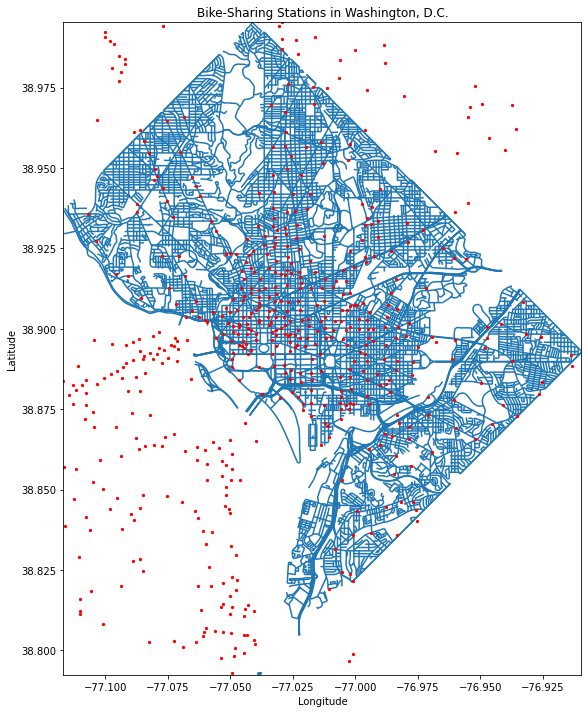

In [279]:
washington = gpd.read_file('ignore/tl_2018_11001_roads/tl_2018_11001_roads.shp')

# Create a new figure and axis

fig, ax = plt.subplots(figsize=(12, 12))
# Plot the Washington, D.C. map
washington.plot(ax=ax, zorder= 1)

# Plot the GeoDataFrame on the axis
geo_df.plot(ax=ax, marker='o', color='red', markersize=5, zorder=2)

# Set the plot extent to Washington, D.C.
ax.set_xlim(washington.total_bounds[0], washington.total_bounds[2])
ax.set_ylim(washington.total_bounds[1], washington.total_bounds[3])

# Customize the map appearance (optional)
ax.set_title("Bike-Sharing Stations in Washington, D.C.")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Display the map
plt.show()

In [280]:
geometry = [Point(xy) for xy in zip(df_bikes['longitude'], df_bikes['latitude'])]
crs = {'init':'epsg:4326'}
geometry[:3]

In [282]:
geo_df = gpd.GeoDataFrame(df_bikes, #specify our data
                          crs=crs, #specify our coordinate reference system
                          geometry=geometry) #specify the geometry list we created

/Users/maxremme/opt/anaconda3/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


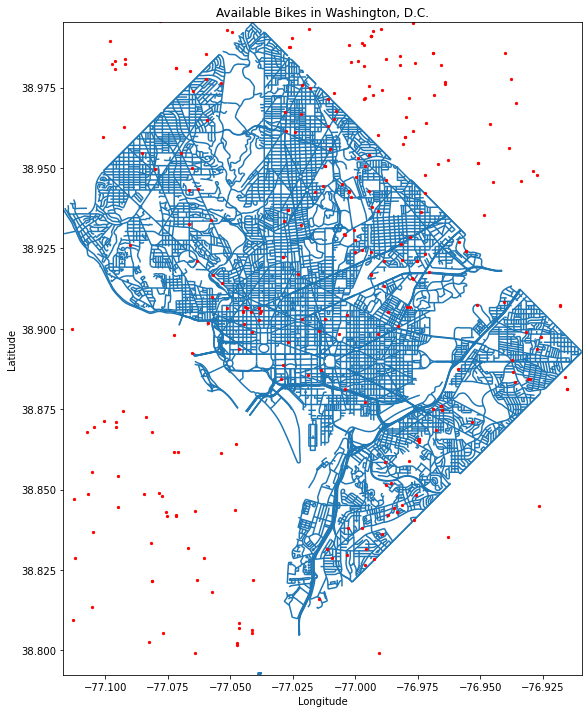

In [283]:
washington = gpd.read_file('datasets/tl_2018_11001_roads/tl_2018_11001_roads.shp')

# Create a new figure and axis

fig, ax = plt.subplots(figsize=(12, 12))
# Plot the Washington, D.C. map
washington.plot(ax=ax, zorder= 1)

# Plot the GeoDataFrame on the axis
geo_df.plot(ax=ax, marker='o', color='red', markersize=5, zorder=2)

# Set the plot extent to Washington, D.C.
ax.set_xlim(washington.total_bounds[0], washington.total_bounds[2])
ax.set_ylim(washington.total_bounds[1], washington.total_bounds[3])

# Customize the map appearance (optional)
ax.set_title("Available Bikes in Washington, D.C.")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Display the map
plt.show()